In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [43]:
# Tu są pliki moje lokalne, to trzeba zmienic nazwy

df1 = pd.read_parquet('./MachineLearningPARQUET/Monday-WorkingHours.pcap_ISCX.parquet')
df2 = pd.read_parquet('./MachineLearningPARQUET/Tuesday-WorkingHours.pcap_ISCX.parquet')
df3 = pd.read_parquet('./MachineLearningPARQUET/Wednesday-workingHours.pcap_ISCX.parquet')
df4 = pd.read_parquet('./MachineLearningPARQUET/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.parquet')
df5 = pd.read_parquet('./MachineLearningPARQUET/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.parquet')
df6 = pd.read_parquet('./MachineLearningPARQUET/Friday-WorkingHours-Morning.pcap_ISCX.parquet')
df7 = pd.read_parquet('./MachineLearningPARQUET/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.parquet')
df8 = pd.read_parquet('./MachineLearningPARQUET/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.parquet')

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])

Monday = pd.concat([df1])
Tuesday = pd.concat([df2])
Wednesday = pd.concat([df3])
Thursday = pd.concat([df4, df5])
Friday = pd.concat([df6, df7, df8])

df.reset_index(drop=True, inplace=True)
print("Shape of combined DataFrame:", df.shape)
df.columns

Shape of combined DataFrame: (2313810, 77)


Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Fwd Packets Length Total', 'Bwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag

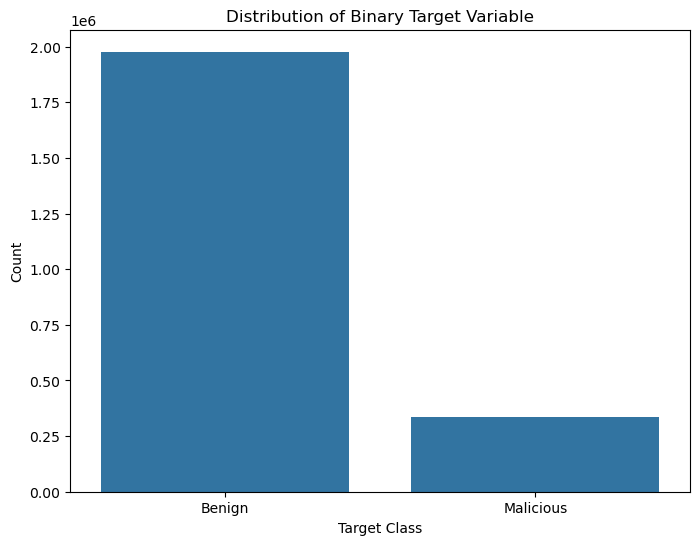

Class 0 ratio: 85.46%
Class 1 ratio: 14.54%


In [44]:
X = df.copy()
X = X.drop('Label', axis=1)

y = df['Label'].copy()
y = y.map({'Benign': 0}).fillna(1)

plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Binary Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malicious'])
plt.show()

class_counts = y.value_counts()
class_ratios = class_counts / len(y)

print(f"Class 0 ratio: {class_ratios[0]*100:.2f}%")
print(f"Class 1 ratio: {class_ratios[1]*100:.2f}%")

In [45]:
label_counts = df['Label'].value_counts()
print(label_counts)

Benign                        1977318
DoS Hulk                       172846
DDoS                           128014
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1956
Web Attack � Brute Force         1470
Bot                              1437
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64


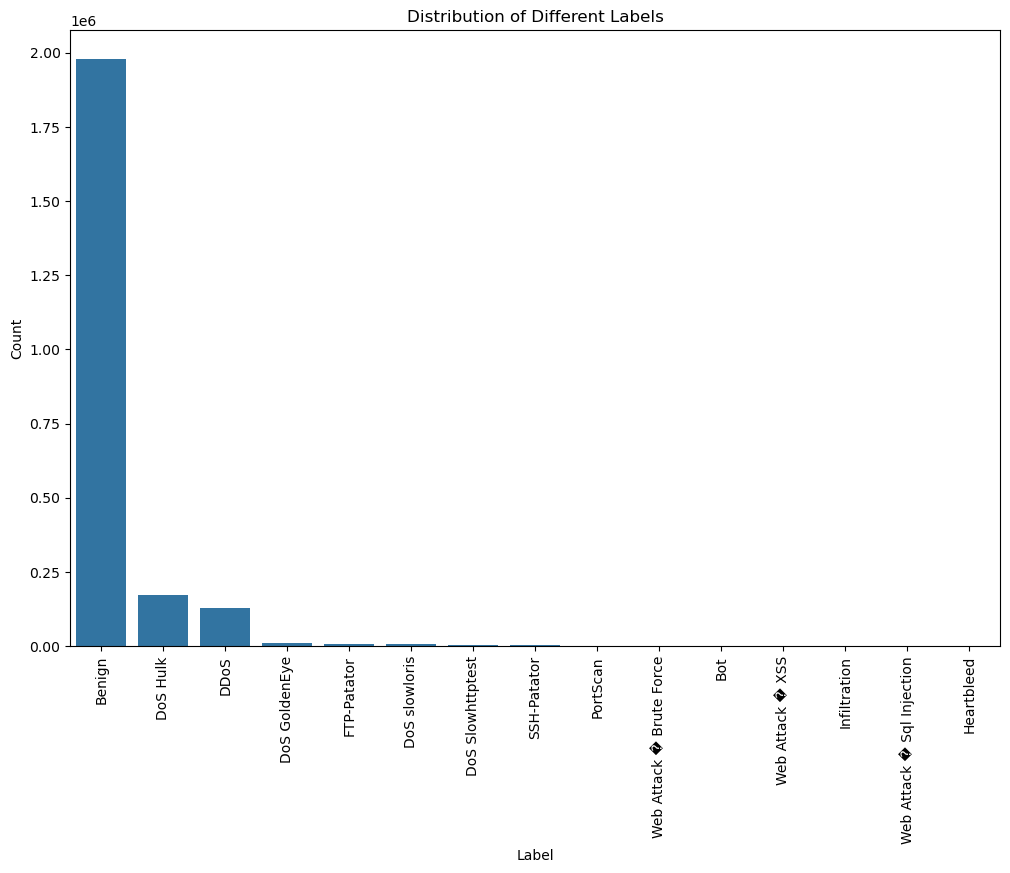

In [46]:
# Wykres słupkowy dla Label
plt.figure(figsize=(12, 8))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Different Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

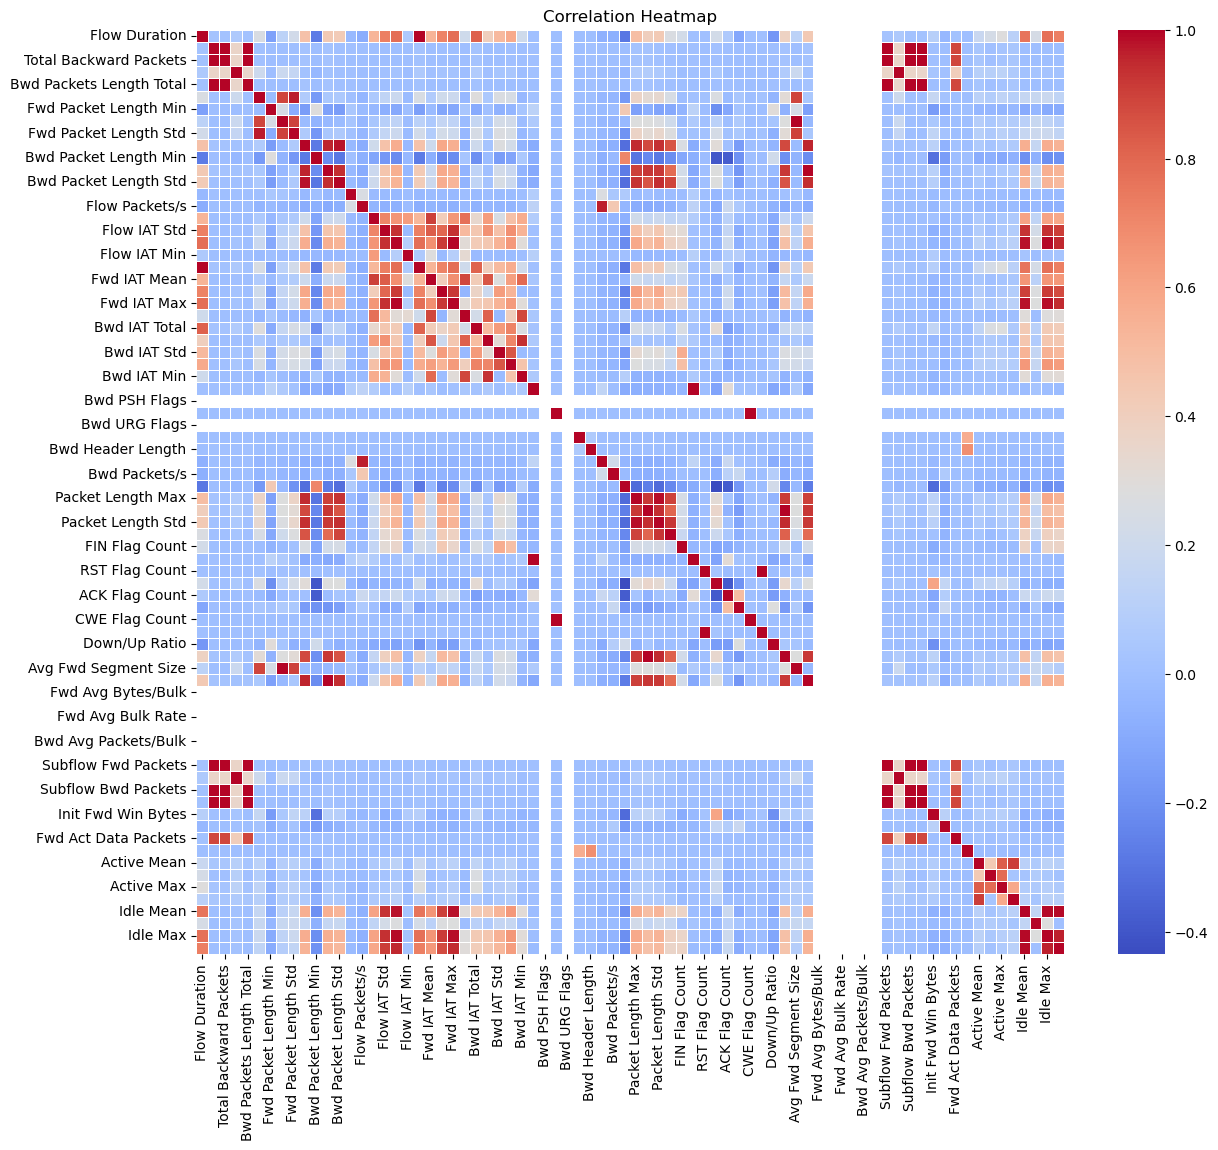

In [48]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [49]:
print("Monday:")
print(Monday['Label'].value_counts(), end='\n\n')
print("Tuesday:")
print(Tuesday['Label'].value_counts(), end='\n\n')
print("Wednesday:")
print(Wednesday['Label'].value_counts(), end='\n\n')
print("Thursday:")
print(Thursday['Label'].value_counts(), end='\n\n')
print("Friday:")
print(Friday['Label'].value_counts(), end='\n\n')

Monday:
Benign    458831
Name: Label, dtype: int64

Tuesday:
Benign         380564
FTP-Patator      5931
SSH-Patator      3219
Name: Label, dtype: int64

Wednesday:
Benign              391235
DoS Hulk            172846
DoS GoldenEye        10286
DoS slowloris         5385
DoS Slowhttptest      5228
Heartbleed              11
Name: Label, dtype: int64

Thursday:
Benign                        361271
Web Attack � Brute Force        1470
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Name: Label, dtype: int64

Friday:
Benign      385417
DDoS        128014
PortScan      1956
Bot           1437
Name: Label, dtype: int64



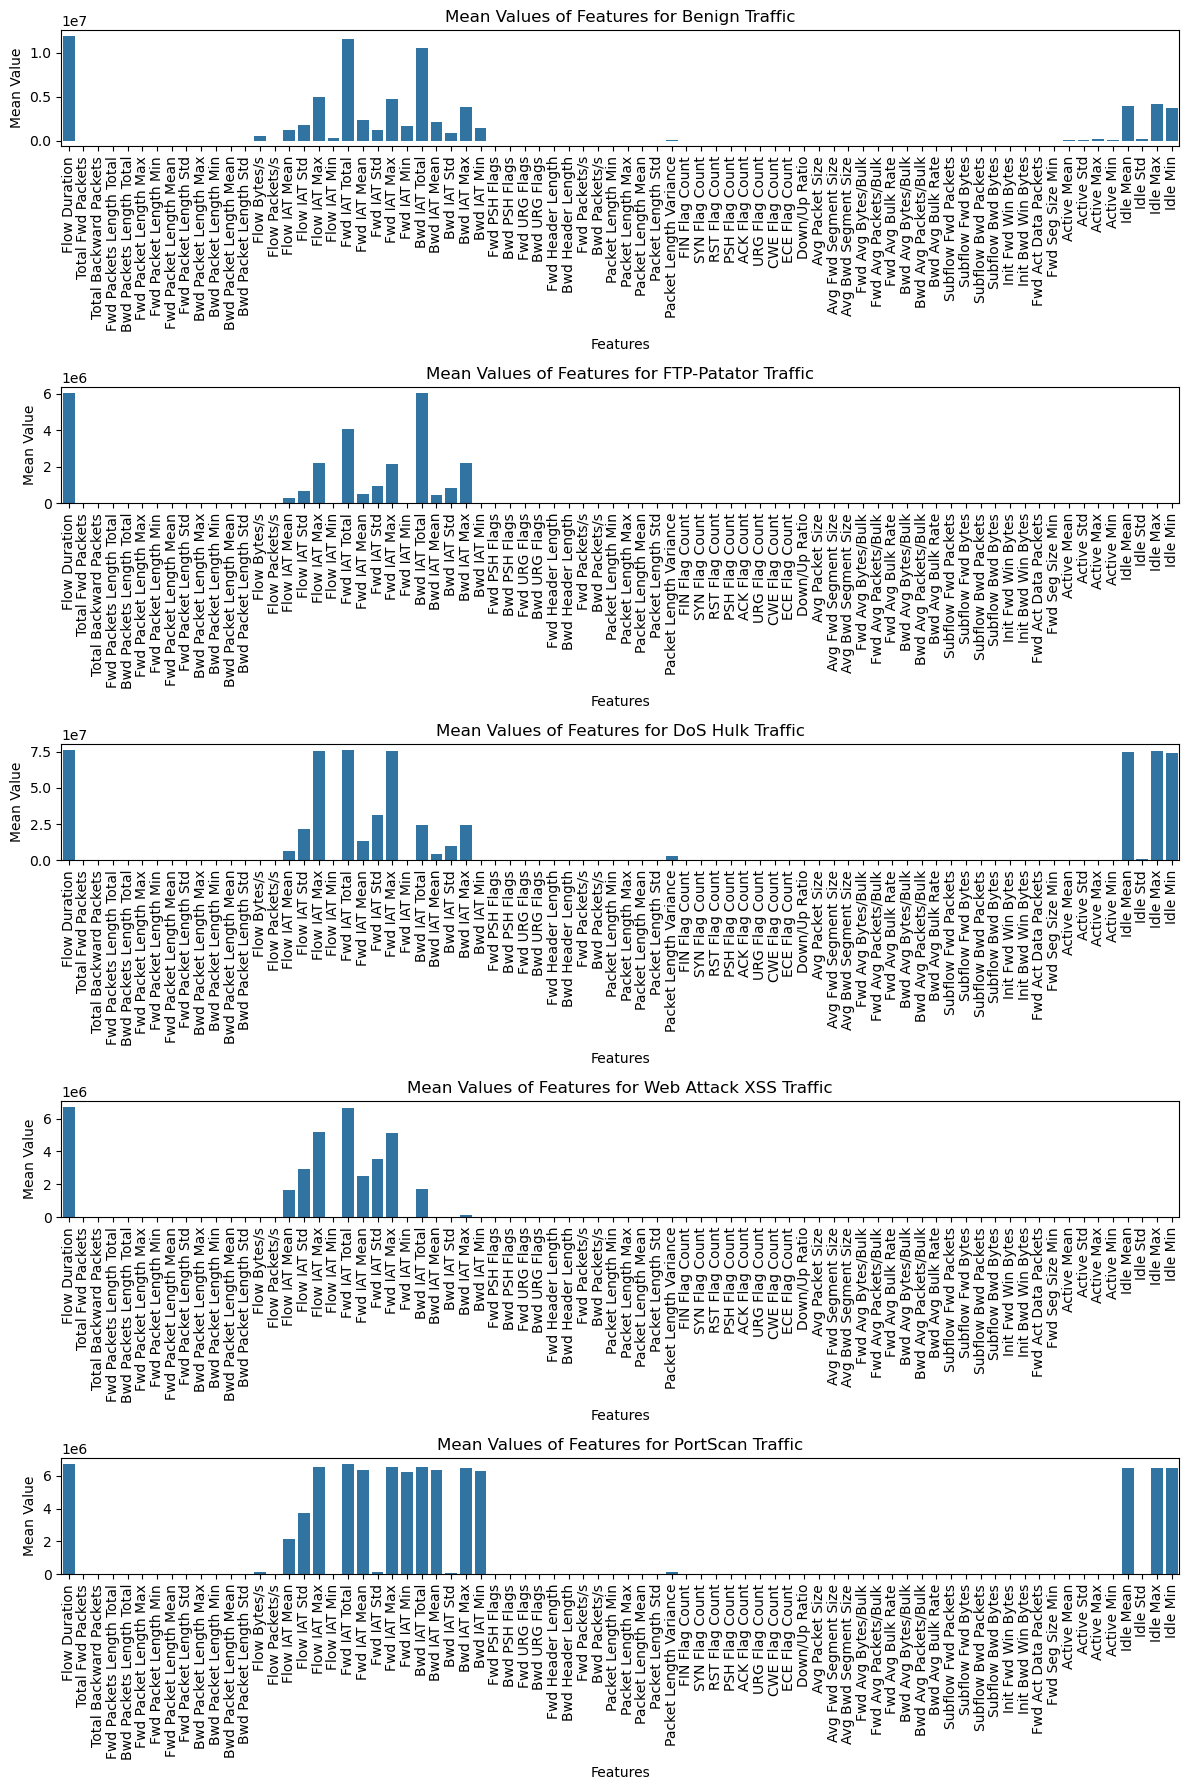

In [53]:
# Przykładowe rozkłady dla różnych ataków

Benign_data = Monday[Monday['Label'] == "Benign"]
Benign_mean_values = Benign_data.mean(numeric_only=True)

FTP_Patator = Tuesday[Tuesday['Label'] == "FTP-Patator"]
FTP_mean_Patator = FTP_Patator.mean(numeric_only=True)

DoS_Hulk_data = Wednesday[Wednesday['Label'] == "DoS Hulk"]
DoS_Hulk_mean_values = DoS_Hulk_data.mean(numeric_only=True)

XSS_data = Thursday[Thursday['Label'] == "Web Attack � XSS"]
XSS_mean_values = XSS_data.mean(numeric_only=True)

PortScan_data = Friday[Friday['Label'] == "PortScan"]
PortScan_mean_values = PortScan_data.mean(numeric_only=True)

plt.figure(figsize=(12, 18))

plt.subplot(5, 1, 1)
sns.barplot(x=Benign_mean_values.index, y=Benign_mean_values.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features for Benign Traffic")

plt.subplot(5, 1, 2)
sns.barplot(x=FTP_mean_Patator.index, y=FTP_mean_Patator.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features for FTP-Patator Traffic")

plt.subplot(5, 1, 3)
sns.barplot(x=DoS_Hulk_mean_values.index, y=DoS_Hulk_mean_values.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features for DoS Hulk Traffic")

plt.subplot(5, 1, 4)
sns.barplot(x=XSS_mean_values.index, y=XSS_mean_values.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features for Web Attack XSS Traffic")

plt.subplot(5, 1, 5)
sns.barplot(x=PortScan_mean_values.index, y=PortScan_mean_values.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features for PortScan Traffic")

plt.tight_layout()
plt.show()